In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [14]:
def plot(deephyperedges_directory,MLP_directory,deepsets_directory,metric,dataset):
    dhe_metrics = pd.read_csv(deephyperedges_directory)
    x = []
    y = []
    for index, row in dhe_metrics.iterrows():
        x.append(float(row["Step"]))
        y.append(float(row["Value"]))

    mlp_metrics = pd.read_csv(MLP_directory)
    x_mlp = []
    y_mlp = []
    for index, row in mlp_metrics.iterrows():
        x_mlp.append(float(row["Step"]))
        y_mlp.append(float(row["Value"]))

    ds_metrics = pd.read_csv(deepsets_directory)
    x_ds = []
    y_ds = []
    for index, row in ds_metrics.iterrows():
        x_ds.append(float(row["Step"]))
        y_ds.append(float(row["Value"]))
    sns.set()
    # sns.relplot(x="Step", y="Value",
    #             kind="line", data=dhe_metrics);
    # sns.relplot(x="Step", y="Value",
    #             kind="line", data=ds_metrics);

    ds_normal = '(0.0, 0.0, 0.7, 0.2)'
    ds_smoothed = '(0.0, 0.0, 0.7, 1)'
    dh_normal = '(0.0, 0.7, 0.0, 0.2)'
    dh_smoothed = '(0.0, 0.7, 0.0, 1)'
    mlp_normal = '(0.7, 0.2, 0.1, 0.2)'
    mlp_smoothed = '(0.7, 0.2, 0.1, 1)'

    plt.gca().set_prop_cycle(color=[mlp_normal, ds_normal,
                                    dh_normal, mlp_smoothed,
                                    ds_smoothed, dh_smoothed])
    plt.plot(x_mlp, y_mlp)
    plt.plot(x_ds, y_ds)
    plt.plot(x, y)

    plt.plot(x_mlp, smooth(y_mlp, 0.8))
    plt.plot(x_ds, smooth(y_ds, 0.8))
    plt.plot(x, smooth(y, 0.8))


    plt.legend(['_nolegend_','_nolegend_','_nolegend_','MLP + TAS Walks','Deep Sets + SAT Walks','Deep Hyperedges'], loc='bottom right')

    plt.savefig("images/paper/"+dataset+"/"+metric+".png",dpi=300)
    plt.show()

In [15]:
def plotAll(dataset):
    metric = "run-.-tag-categorical_accuracy.csv"
    deephyperedges_directory = "images/paper/"+dataset+"/deephyperedges/"+metric
    MLP_directory = "images/paper/"+dataset+"/MLP/"+metric
    deepsets_directory = "images/paper/"+dataset+"/deepsets/"+metric
    plot(deephyperedges_directory,MLP_directory,deepsets_directory,"train_accuracy",dataset)

    metric = "run-.-tag-loss.csv"
    deephyperedges_directory = "images/paper/"+dataset+"/deephyperedges/"+metric
    MLP_directory = "images/paper/"+dataset+"/MLP/"+metric
    deepsets_directory = "images/paper/"+dataset+"/deepsets/"+metric
    plot(deephyperedges_directory,MLP_directory,deepsets_directory,"train_loss",dataset)


    metric = "run-.-tag-val_categorical_accuracy.csv"
    deephyperedges_directory = "images/paper/"+dataset+"/deephyperedges/"+metric
    MLP_directory = "images/paper/"+dataset+"/MLP/"+metric
    deepsets_directory = "images/paper/"+dataset+"/deepsets/"+metric
    plot(deephyperedges_directory,MLP_directory,deepsets_directory,"validation_accuracy",dataset)


    metric = "run-.-tag-val_loss.csv"
    deephyperedges_directory = "images/paper/"+dataset+"/deephyperedges/"+metric
    MLP_directory = "images/paper/"+dataset+"/MLP/"+metric
    deepsets_directory = "images/paper/"+dataset+"/deepsets/"+metric
    plot(deephyperedges_directory,MLP_directory,deepsets_directory,"validation_loss",dataset)


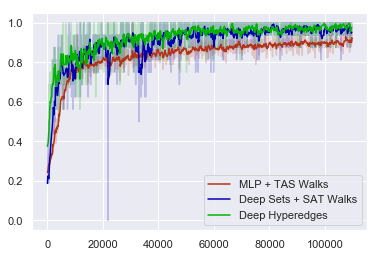

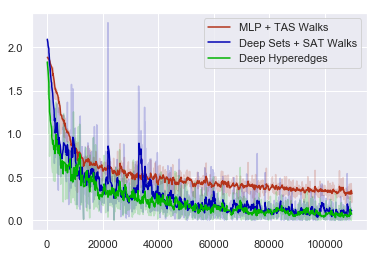

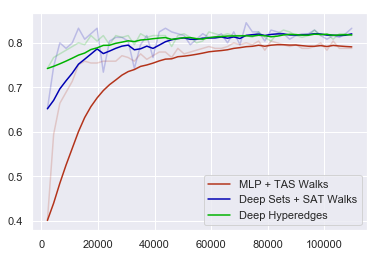

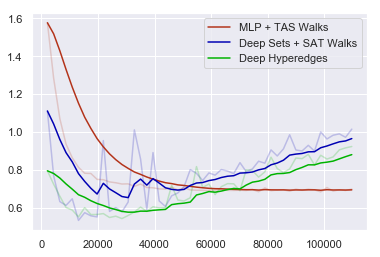

In [10]:
plotAll("cora")

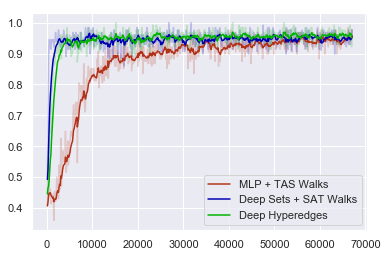

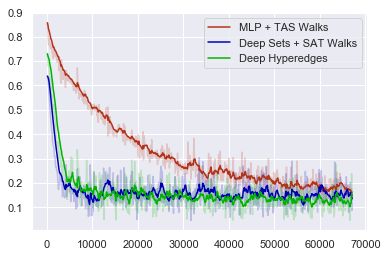

In [16]:
plotAll("corum_diff_dist")

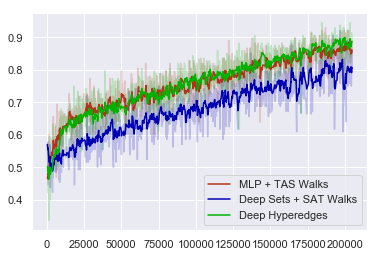

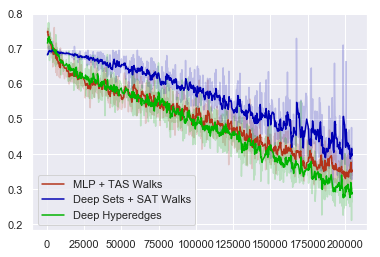

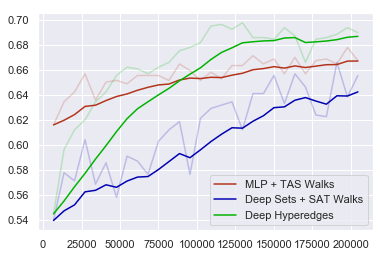

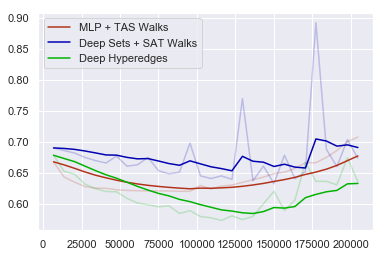

In [12]:
plotAll("corum_same_dist")

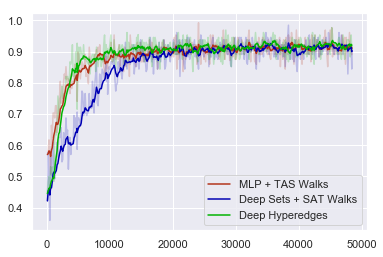

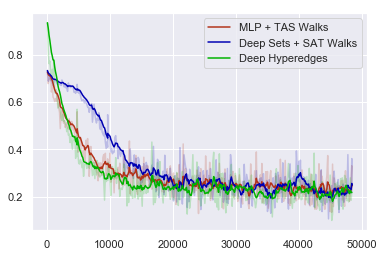

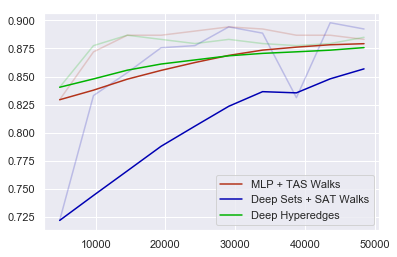

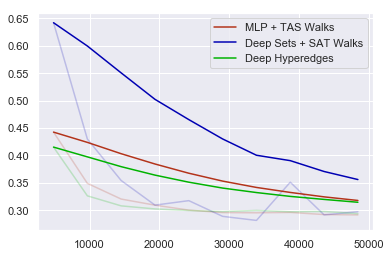

In [13]:
plotAll("meetup2cl")

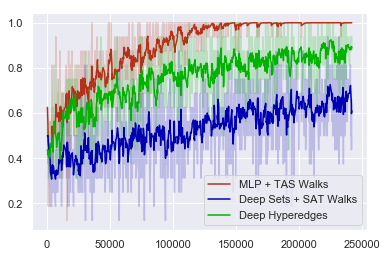

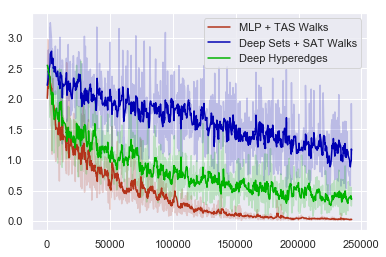

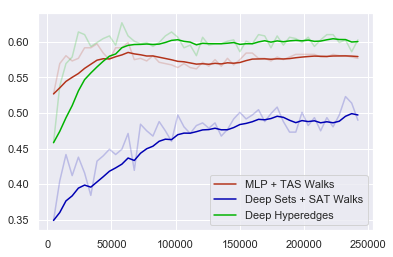

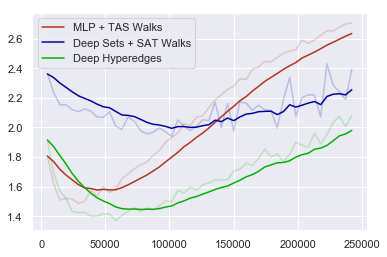

In [14]:
plotAll("meetup33cl")

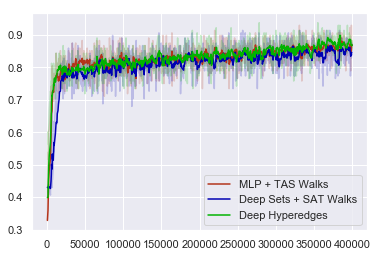

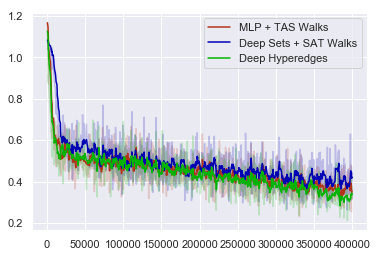

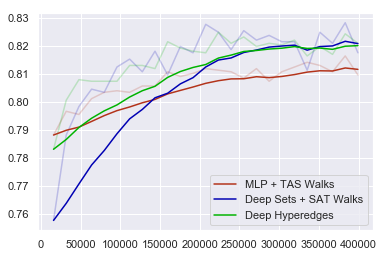

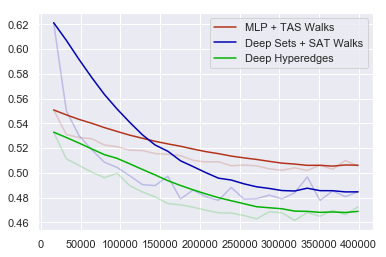

In [15]:
plotAll("pubmed")

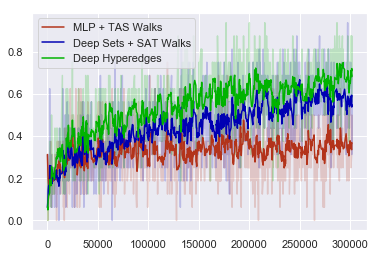

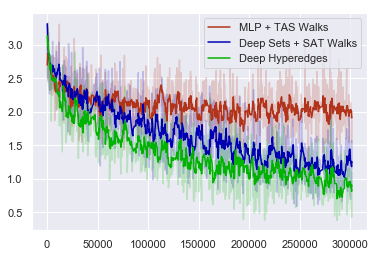

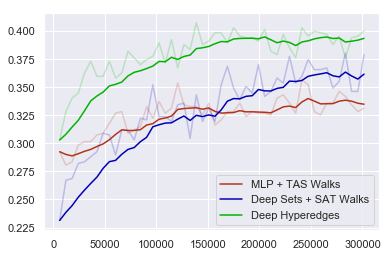

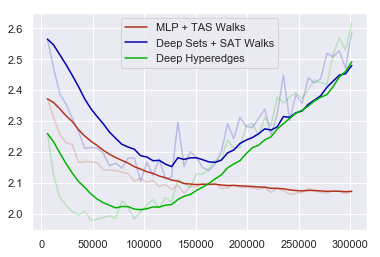

In [16]:
plotAll("disgenet")

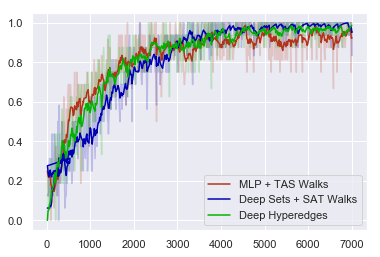

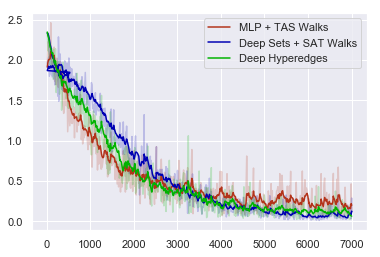

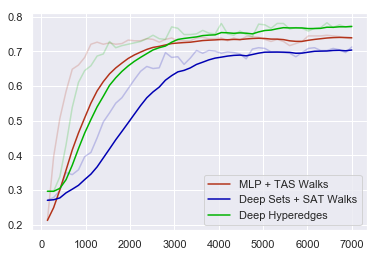

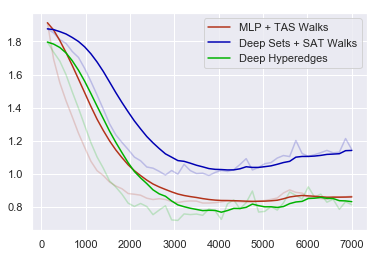

In [17]:
plotAll("cora_transductive")

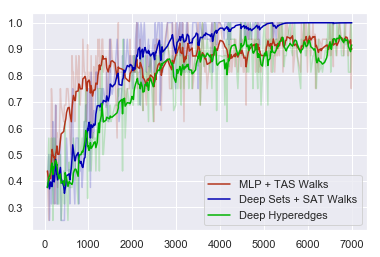

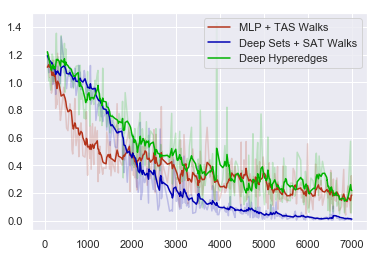

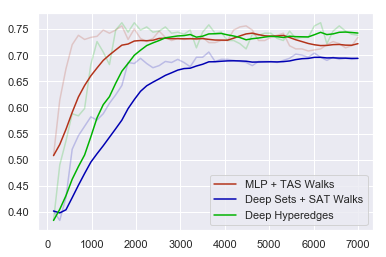

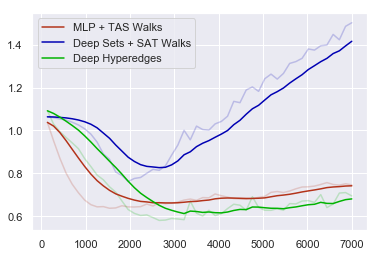

In [11]:
plotAll("pubmed_transductive")